Confusion Matrix:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
Accuracy: 0.97
F1-Score: 0.97


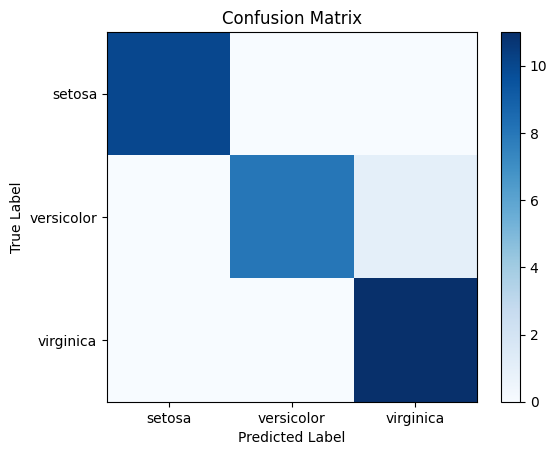

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

data = pd.read_csv('dataset_procesado.csv')

# Eliminar la columna 'categoria_edad'
data = data.drop(['age_group'], axis=1)

# Load Iris dataset
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

X_train = X_train[:, : -1]
X_test = X_test[:, : -1]

# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Calculate F1-Score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1-Score: {f1:.2f}')

# Plot confusion matrix
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(range(len(iris.target_names)), iris.target_names)
plt.yticks(range(len(iris.target_names)), iris.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
